In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
import os
from scipy import stats

In [2]:
folder_path = r'C:\Users\camle\Desktop\Rankin-Lab\Poster_presentation_data'

os.chdir(folder_path) #<- setting your working directory so that your images will be saved here

num_files = 0

filelist = list() #<- empty list
for root, dirs, files in os.walk(folder_path): #<- this for loop goes through your folder 
    for name in files:
        
        num_files += 1
        
        if name.endswith('.dat'): #<- and takes out all files with a .dat (file that contains your data)
            filepath = os.path.join(root, name) #<- Notes down the file path of each data file
            filelist.append(filepath) #<- saves it into the list
    
print("Successfully compiled " + str(num_files) + " files.")

Successfully compiled 109 files.


### Method 1: Bin first, then calculate ROC

In [3]:
def bin_data(df, bin_size):
    """
    Groups and cleans data into discrete bins of a given bin_size and drops all NaN rows. Returns the binned/cleaned dataframe
    
    Parameters
    ----------
    df : pandas Series
    bin_size : float
    """
    
    dividend = int(1200/bin_size)

    bin_values = np.linspace(0, 1200, dividend)    
    bin_labels = np.arange(1, len(bin_values))
    # We want this to be 1, len(bin_values) because labels must be one less than the total number of bin_values

    df['time_bin'] = pd.cut(df[0], bin_values, labels=bin_labels)

    df['time_bin'] = pd.to_numeric(df['time_bin'])
    df['time'] = df['time_bin'] * bin_size

    binned_df = df.groupby('time_bin').agg('mean')

    binned_df = binned_df.rename(columns={1: "speed"})
    binned_df = binned_df.drop(columns=[0, 2, 3, 4, 5])
    binned_df = binned_df[['time', 'speed']] # Reorder columns

    return binned_df

In [ ]:
### Specify your bin size here

bin_size = 5

# This cell will have to be customized if you are working with a different dataset

### General logic:

1. Iterate throught each file in filelist specified above 
2. Searches for strain specific identifiers in the file name
3. Creates an empty dataframe, calculates ROC, does some formatting in the columns
4. Concatenates this new dataframe will a master dataframe called all_data
5. Repeat steps 1-4

Note: to use this correctly for a new dataset, we will have to run the cell below twice- once to make a big bins dataset (binsize = 5)and once to make a small bins dataset (binsize = 1). The reason for this is because we want to call our visualization function to make the ROC graph with a big binsize (to minimize noise) and the speed vs time graph with a small binsize

When working with a new dataset, you will have to enter strain specific identifiers

In [5]:
all_data = pd.DataFrame()

plate_number = 1
num_wt = 0
num_lrk_1 = 0
num_vps35_906 = 0
num_vps35_907 = 0


for file in filelist:
    
    if 'AQ2028_8x4_' in file or 'AQ2028_b_' in file: # Looks for identifier for WT strain
        df = pd.read_csv(file, sep=' ', skiprows = 0, header = None)
        
        df = bin_data(df, bin_size)
        
        df['rate_of_change'] = df['speed'].diff()/df['time'].diff()        
        df['strain'] = 'wild type'       
        df['plate_number'] = plate_number
        df.columns = ['time', 'speed', 'rate_of_change','strain', 'plate_number']
        
        
        all_data = pd.concat([all_data, df], ignore_index = True)        
        plate_number += 1
        num_wt += 1
        
        
    elif 'VG884_8x4_' in file or 'VG885_8x4_' in file: # Looks for identifier for lrk-1 strain
        df = pd.read_csv(file, sep=' ', skiprows = 0, header = None)
        
        df = bin_data(df, bin_size)
        
        df['rate_of_change'] = df['speed'].diff()/df['time'].diff()        
        df['strain'] = 'lrk-1'       
        df['plate_number'] = plate_number
        df.columns = ['time', 'speed', 'rate_of_change','strain', 'plate_number']
        
        
        all_data = pd.concat([all_data, df], ignore_index = True)        
        plate_number += 1
        num_lrk_1 += 1
        
    elif 'VG906_b_' in file: # Looks for identifier for vps-25 VG906 strain
        df = pd.read_csv(file, sep=' ', skiprows = 0, header = None)

        df = bin_data(df, bin_size)

        df['rate_of_change'] = df['speed'].diff()/df['time'].diff()        
        df['strain'] = 'vps-35_VG906'       
        df['plate_number'] = plate_number
        df.columns = ['time', 'speed', 'rate_of_change','strain', 'plate_number']

        all_data = pd.concat([all_data, df], ignore_index = True)        
        plate_number += 1
        num_vps35_906 += 1
        
    elif 'VG907_b_' in file: # Looks for identifier for vps-35 VG907 strain
        df = pd.read_csv(file, sep=' ', skiprows = 0, header = None)

        df = bin_data(df, bin_size)

        df['rate_of_change'] = df['speed'].diff()/df['time'].diff()        
        df['strain'] = 'vps-35_VG907'       
        df['plate_number'] = plate_number
        df.columns = ['time', 'speed', 'rate_of_change','strain', 'plate_number']

        all_data = pd.concat([all_data, df], ignore_index = True)        
        plate_number += 1
        num_vps35_907 += 1

all_data.to_csv('poster_data_big_bins.csv', index=False)

print("Successfully cleaned {} WT, {} lrk-1, {} vps-35_906, {} vps-35_907 plates".format(num_wt, num_lrk_1, num_vps35_906, num_vps35_907))

Successfully cleaned 10 WT, 9 lrk-1, 6 vps-35_906, 6 vps-35_907 plates


# Check to see everything is loaded in properly

In [23]:
poster_data = pd.read_csv(r'C:\Users\camle\Desktop\Rankin-Lab\Poster_presentation_data\poster_data.csv')
poster_data_big_bins = pd.read_csv(r'C:\Users\camle\Desktop\Rankin-Lab\Poster_presentation_data\poster_data_big_bins.csv')

print(poster_data.head())
print(poster_data_big_bins.head())

   time    speed  rate_of_change     strain  plate_number
0   1.0  0.00000             NaN  wild type             1
1   2.0  0.00000         0.00000  wild type             1
2   3.0  0.00000         0.00000  wild type             1
3   4.0  0.20040         0.20040  wild type             1
4   5.0  0.27005         0.06965  wild type             1
   time     speed  rate_of_change     strain  plate_number
0   5.0  0.088720             NaN  wild type             1
1  10.0  0.245808        0.031418  wild type             1
2  15.0  0.234032       -0.002355  wild type             1
3  20.0  0.230331       -0.000740  wild type             1
4  25.0  0.226227       -0.000821  wild type             1


### Set palette and light bars

In [5]:
palette = {'wild type':'C0', 'lrk-1':'C3', 'vps-35_VG906':'C2', 'vps-35_VG907':'C1'}

In [6]:
lighton = np.arange(300, 940, 70) # where the bars start (start of first pulse, end of last pulse, time between)
lightoff = np.arange(310, 950, 70) # where the bars end (end of first pulse, end of last pulse + 10s, time between)


# create the dictionary
d1 = dict( zip(lighton, lightoff) )
# check
print("d1 = {}".format(d1))
# turn the dictionary into an ITERABLE list of tuples
d2 = list(d1.items()) 

d1 = {300: 310, 370: 380, 440: 450, 510: 520, 580: 590, 650: 660, 720: 730, 790: 800, 860: 870, 930: 940}


# Optional Function to plot a linear model of the data

In [11]:
def lin_reg_plot(df, start, stop):
    """
    Plots a linear model
    
    Parameters
    ----------
    df : pandas Series
    start: int
    stop: int
    """
    
    small_df = df.loc[(df['time'] <= stop) & (df['time'] >= start)]

    # We want to take the mean ROC at each 1.5 second interval for each strain individually, and plot that
    # This way we should have one data point, per strain, per second, eliminating noise and allowing us
    # to model a linear regression line

    small_df = small_df.groupby(['time', 'strain'], as_index=True).mean()
    small_df.reset_index(level=0, inplace=True)
    small_df.reset_index(level=0, inplace=True)

    ### Since we averaged every 1.5s, plate_number has no meaning anymore
    small_df = small_df.drop(columns=['plate_number'])

    plt.figure(linewidth = 0.1)
    sns.set_style("whitegrid")
    sns.despine()

    p=sns.lmplot(x="time", 
         y="rate_of_change", 
         data = small_df,
         hue = 'strain',
         palette = palette,
         legend=False,
         line_kws={'label':"Linear Reg"}
        )
    
    # statistics calculations
    slope1, intercept1 = calculate_stats('wild type', small_df)
    slope2, intercept2 = calculate_stats('lrk-1', small_df)
    slope3, intercept3 = calculate_stats('vps-35', small_df)

    ax = p.axes[0, 0]
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    leg = ax.get_legend()
    L_labels = leg.get_texts()



    label_line_1 = r'y={0:.1e}x+{1:.1e}'.format(slope1,intercept1)
    label_line_2 = r'y={0:.1e}x+{1:.1e}'.format(slope2,intercept2)
    label_line_3 = r'y={0:.1e}x+{1:.1e}'.format(slope3,intercept3)
    L_labels[0].set_text(label_line_1)
    L_labels[1].set_text(label_line_2)
    L_labels[2].set_text(label_line_3)

    return None



In [12]:
def calculate_stats(strain, small_df):
    """
    calculates slope, intercept, r, p, and std_error for a given strain. For use in conjunction with lin_reg_plot.
    Returns slope and intercept
    """
    
    strain = small_df.loc[(small_df['strain'] == strain)]
    slope, intercept, r_value, p_value, std_err = stats.linregress(strain['time'], strain['rate_of_change'])
    
    return slope, intercept

In [21]:
print(calculate_stats('lrk-1'), small_df)
print(calculate_stats('wild type'), small_df)


TypeError: calculate_stats() missing 1 required positional argument: 'small_df'

In [22]:
lin_reg_plot(poster_data, 315, 369)

KeyError: 'vps-35_VG906'

<Figure size 432x288 with 0 Axes>

# Load in core functions

In [7]:


def analyze_by_plate2(df1, df2, start, stop):
    """
    Takes a start time and an end time in seconds and analyzes and plots worm data from each plate
    seperately. This uses a different visualization method than analyze_by_plate
    
    Parameters
    ----------
    df : pandas Series
    start : float
    stop : float
    
    """
    small_bins = df1.loc[(df1['time'] <= stop) & (df1['time'] >= start)]
    big_bins = df2.loc[(df2['time'] <= stop) & (df2['time'] >= start)]
    
    plt.figure(linewidth = 0.1)
    sns.set_style("whitegrid")

    fig, ax = plt.subplots(1,2)
    sns.despine()

    ax1=sns.lineplot(x="time", 
                 y="rate_of_change", 
                 data = big_bins,
                 hue = 'strain',
                 style = 'strain',
                 units = 'plate_number',
                 estimator = None,
                 palette = palette,
                ax=ax[0])

    ax2=sns.lineplot(x="time", 
                 y="speed", 
                 data = small_bins,
                 hue = 'strain',
                 style = 'strain',
                 units = 'plate_number',
                 estimator = None,
                 palette = palette,
                 ax=ax[1])

    ax1.set_title('Rate of Change vs Time')
    ax2.set_title('Speed vs Time')

    ax1.set_ylabel('Rate of Change')
    ax2.set_ylabel('Speed')

    ax1.set_xlabel('Time (s)')
    ax2.set_xlabel('Time (s)')

    ax1.get_legend().remove()

    # Put the legend out of the figure
    ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = '13')

    fig.show()
    
    return None

In [21]:
### Same as above, but allows a second dataframe to be selected that uses different bins

def analyze_data2(df1, df2, start, stop):
    """
    Takes a start time and an end time in seconds and analyzes and plots worm data from all plates
    
    Parameters
    ----------
    df : pandas Series
    start : float
    stop : float
    
    """
    
    small_bins = df1.loc[(df1['time'] <= stop) & (df1['time'] >= start)]
    big_bins = df2.loc[(df2['time'] <= stop) & (df2['time'] >= start)]
    
    plt.figure(linewidth = 0.1)
    sns.set_style("whitegrid")

    fig, ax = plt.subplots(1,2, figsize=(12, 7))
    sns.despine()
    
    for tuple in d2:
        plt.axvspan(xmin=tuple[0], xmax=tuple[1], facecolor="#99FFFF", alpha=0.2)

    ax1=sns.lineplot(x="time", 
                 y="rate_of_change", 
                 data = big_bins,
                 hue = 'strain',
                 palette = palette,
                ax=ax[0])

    ax2=sns.lineplot(x="time", 
                 y="speed", 
                 data = small_bins,
                 hue = 'strain',
                 palette = palette,
                 ax=ax[1])

    ax1.set_title('Rate of Change vs Time')
    ax2.set_title('Speed vs Time')

    ax1.set_ylabel('Rate of Change')
    ax2.set_ylabel('Speed')

    ax1.set_xlabel('Time (s)')
    ax2.set_xlabel('Time (s)')

    ax1.get_legend().remove()
    

    for tuple in d2:
        plt.axvspan(xmin=tuple[0], xmax=tuple[1], facecolor="#99FFFF", alpha=0.2)
    
    plt.xlim(left= start)
    plt.xlim(right = stop)
    plt.ylim(top = 0.35)
    plt.ylim(bottom = 0)

    # Put the legend out of the figure
    ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = '13')

    fig.show()

    ### Add statistics above the figure
    stats = small_bins.groupby(['strain']).agg('mean')
    stats = stats.drop(columns=['time', 'plate_number'])
    stats.columns = ['avg speed', 'avg rate_of_change']

    # Analyzing first 2s
    first_2 = df1.loc[(df1['time'] <= start+4) & (df1['time'] >= start+2)]

    stats1 = first_2.groupby(['strain']).agg('mean')
    stats1 = stats1.drop(columns=['time', 'plate_number'])
    stats1.columns = ['avg speed in first 2s', 'avg rate_of_change in first 2s']

    stats = pd.concat([stats,stats1], axis=1)
    
    plt.savefig(f'Speed_Trace_{start}to{stop}s.png', format='png', dpi=450) #<- saves the figure to a tif file
    
    
    return stats



### Example plot 1: graph ROC and speed vs time for t=250-500s

In [ ]:
Note: The 

<ipython-input-10-972521191ade>:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,avg speed,avg rate_of_change,avg speed in first 2s,avg rate_of_change in first 2s
strain,,,,
lrk-1,0.178234,0.000086,0.176841,-0.002299
vps-35_VG906,0.088635,-0.000042,0.092042,-0.000502
vps-35_VG907,0.102390,0.000038,0.104942,0.001589
wild type,0.192007,-0.000039,0.246620,-0.000966


<Figure size 432x288 with 0 Axes>

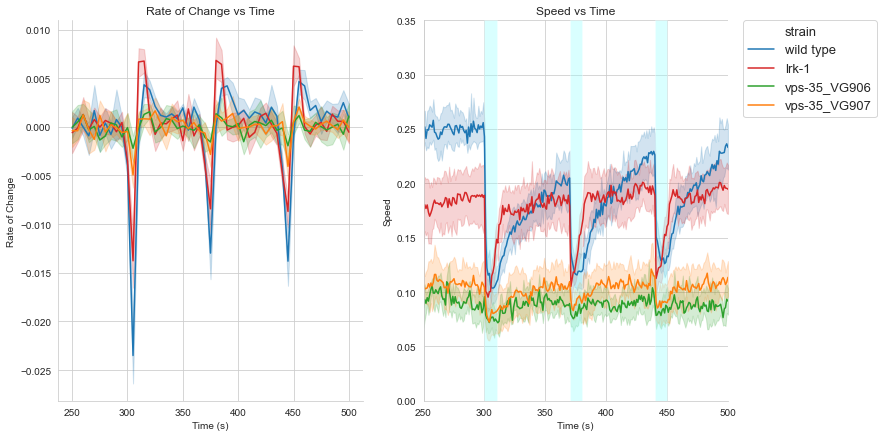

In [12]:
analyze_data2(poster_data, poster_data_big_bins, 250, 500)

<ipython-input-14-972521191ade>:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,avg speed,avg rate_of_change,avg speed in first 2s,avg rate_of_change in first 2s
strain,,,,
lrk-1,0.173679,-0.000062,0.197917,0.000885
vps-35_VG906,0.076804,-0.000039,0.102473,0.000736
vps-35_VG907,0.104395,-0.000019,0.124094,0.004382
wild type,0.219149,0.000010,0.244940,0.001391


<Figure size 432x288 with 0 Axes>

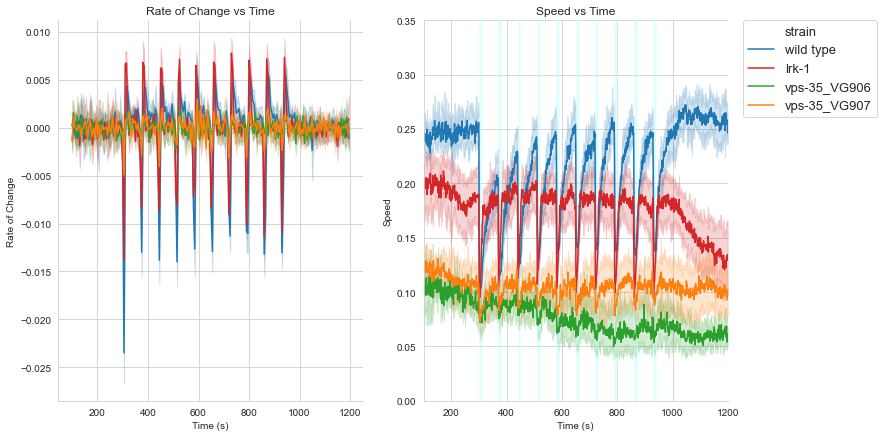

In [30]:
analyze_data2(poster_data, poster_data_big_bins, 100, 1200)

# Plot of the whole experiment

Text(0.5, 1.0, 'Speed vs Time')

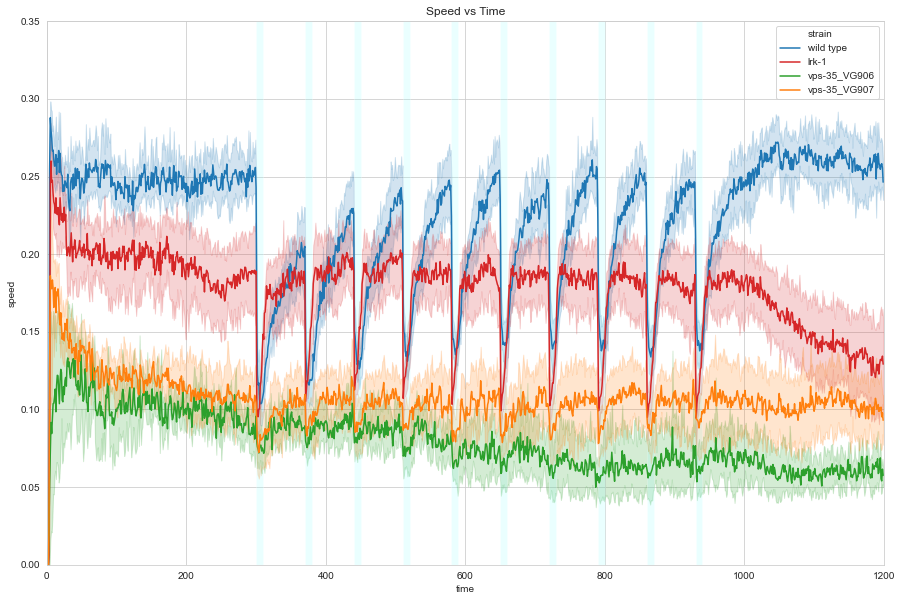

In [20]:

# small_bins = poster_data.loc[(poster_data['time'] <= 1200) & (poster_data['time'] >= 1180)]


fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")

sns.lineplot(x="time", 
         y="speed", 
         data = poster_data,
         hue = 'strain',
         palette = palette
         )

for tuple in d2:
    plt.axvspan(xmin=tuple[0], xmax=tuple[1], facecolor="#99FFFF", alpha=0.2)

plt.xlim(left= 0)
plt.xlim(right = 1200)
plt.ylim(top = 0.35)
plt.ylim(bottom = 0)


ax.set_title('Speed vs Time')
# ax.set_ylabel('Speed')
# ax.set_xlabel('Time (s)')



In [10]:
small_bins

,time,speed,rate_of_change,strain,plate_number
1099,1100.0,0.250322,0.001816,wild type,1
1100,1101.0,0.245476,-0.004845,wild type,1
1101,1102.0,0.248587,0.003110,wild type,1
1102,1103.0,0.246636,-0.001951,wild type,1
1103,1104.0,0.248147,0.001511,wild type,1
...,...,...,...,...,...
37164,1195.0,0.112824,0.003104,vps-35_VG907,31
37165,1196.0,0.094179,-0.018645,vps-35_VG907,31
37166,1197.0,0.077104,-0.017075,vps-35_VG907,31
37167,1198.0,0.095883,0.018779,vps-35_VG907,31


# Zoomed in plot, t=299-315s

<ipython-input-21-aaff6d3a855b>:64: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,avg speed,avg rate_of_change,avg speed in first 2s,avg rate_of_change in first 2s
strain,,,,
lrk-1,0.137355,-0.000593,0.098288,-0.031236
vps-35_VG906,0.078109,-0.000023,0.076448,-0.007058
vps-35_VG907,0.084659,-0.001467,0.081024,-0.009815
wild type,0.132873,-0.006955,0.129765,-0.042408


<Figure size 432x288 with 0 Axes>

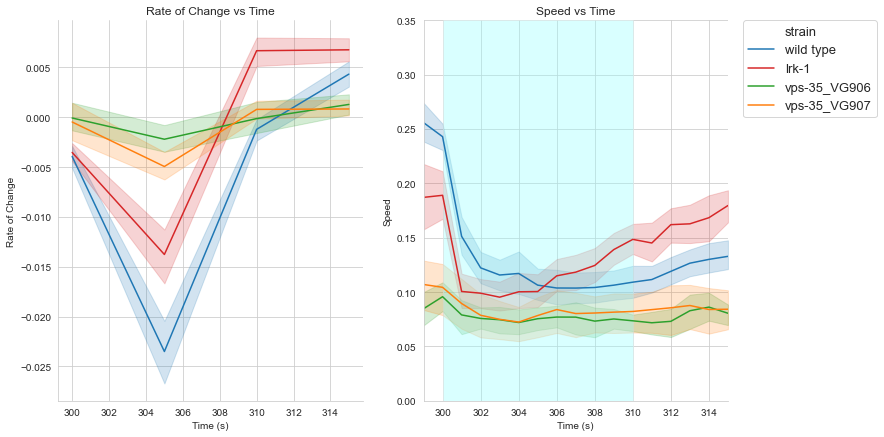

In [24]:
analyze_data2(poster_data, poster_data_big_bins, 299, 315)

## Calculating Avg speed and ROC for all the recovery intervals

In [17]:
recovery_intervals = {311:369, 
                      381:439,
                      451:509,
                      521:579,
                      591:649,
                      731:789,
                      801:859,
                      871:929                      
                     }

recovery_only = pd.DataFrame()

interval = 1

for start, stop in recovery_intervals.items():
    df = poster_data.loc[(poster_data['time'] <= stop) & (poster_data['time'] >= start)]
    df['interval'] = interval
    
    recovery_only = pd.concat([recovery_only, df], ignore_index = True)
    
    interval += 1
    
recovery_only

<ipython-input-17-2fc8c360b4bc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interval'] = interval


,time,speed,rate_of_change,strain,plate_number,interval
0,311.0,0.108475,0.006029,wild type,1,1
1,312.0,0.113800,0.005325,wild type,1,1
2,313.0,0.118383,0.004583,wild type,1,1
3,314.0,0.120600,0.002217,wild type,1,1
4,315.0,0.133215,0.012615,wild type,1,1
...,...,...,...,...,...,...
14627,925.0,0.090076,-0.010484,vps-35_VG907,31,8
14628,926.0,0.117212,0.027136,vps-35_VG907,31,8
14629,927.0,0.145364,0.028152,vps-35_VG907,31,8
14630,928.0,0.143236,-0.002128,vps-35_VG907,31,8


In [52]:
stats = recovery_only.groupby(['strain']).agg('mean')
stats = stats.drop(columns=['time', 'plate_number'])
stats.columns = ['avg speed', 'avg rate of change']

stats


,avg speed,avg rate of change
strain,,
lrk-1,0.184556,0.000638
vps-35_VG906,0.077235,0.000118
vps-35_VG907,0.104673,0.000258
wild type,0.208004,0.001796


In [33]:
df = recovery_only

wildtype = recovery_only.loc[recovery_only['strain'] == 'wild type']
lrk1 = recovery_only.loc[recovery_only['strain'] == 'lrk-1']
vps35 = recovery_only.loc[(recovery_only['strain'] == 'vps-35')]

# stats.ttest_ind(wildtype['speed'], lrk1['speed']) # t-test 

stats.f_oneway(df['speed'][df['strain'] == 'wild type'],
               df['speed'][df['strain'] == 'lrk-1'],
               df['speed'][df['strain'] == 'vps-35'])


# wildtype

F_onewayResult(statistic=15628.64819535522, pvalue=0.0)

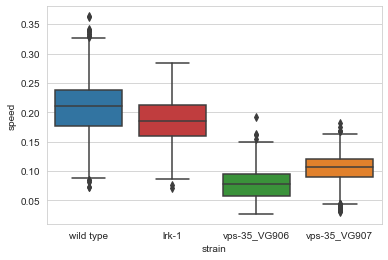

In [53]:
sns.boxplot(x="strain", y="speed", data=recovery_only, palette=palette)

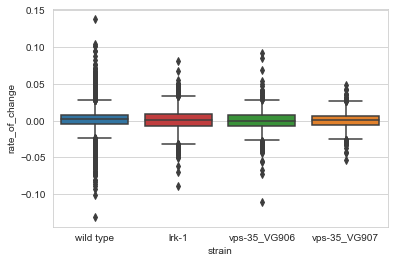

In [54]:
sns.boxplot(x="strain", y="rate_of_change", data=recovery_only, palette=palette)

### The avg speed for each interval

In [ ]:
g = sns.catplot(x="interval", 
                y="speed", 
                hue="strain",
                data=recovery_only,
                kind="bar",
                palette=palette
               )

# Calculating Avg speed and ROC for all the pulses

In [18]:
lighton = np.arange(300, 940, 70) 
lightoff = np.arange(310, 950, 70)
pulses = dict( zip(lighton, lightoff))

pulses_only = pd.DataFrame()

for start, stop in pulses.items():
    df = poster_data.loc[(poster_data['time'] <= stop) & (poster_data['time'] >= start)]
    pulses_only = pd.concat([pulses_only, df], ignore_index = True)
    
pulses_only

,time,speed,rate_of_change,strain,plate_number
0,300.0,0.231193,0.001176,wild type,1
1,301.0,0.121250,-0.109943,wild type,1
2,302.0,0.107733,-0.013517,wild type,1
3,303.0,0.103454,-0.004279,wild type,1
4,304.0,0.094017,-0.009437,wild type,1
...,...,...,...,...,...
3405,936.0,0.100396,0.001880,vps-35_VG907,31
3406,937.0,0.095240,-0.005156,vps-35_VG907,31
3407,938.0,0.092964,-0.002276,vps-35_VG907,31
3408,939.0,0.104744,0.011780,vps-35_VG907,31


In [56]:
stats = pulses_only.groupby(['strain']).agg('mean')
stats = stats.drop(columns=['time', 'plate_number'])
stats.columns = ['avg speed', 'avg rate of change']

stats

,avg speed,avg rate of change
strain,,
lrk-1,0.126530,-0.003422
vps-35_VG906,0.068808,-0.000709
vps-35_VG907,0.088983,-0.001317
wild type,0.145475,-0.009684


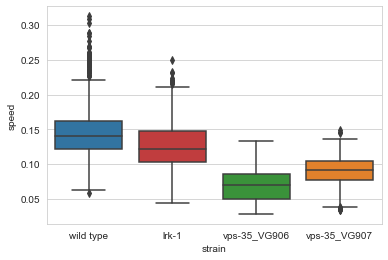

In [57]:
sns.boxplot(x="strain", y="speed", data=pulses_only, palette=palette)

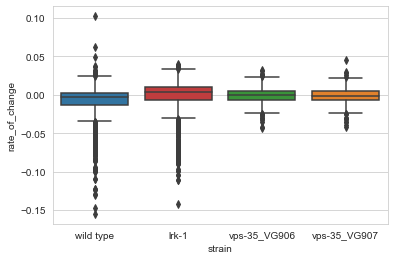

In [58]:
sns.boxplot(x="strain", y="rate_of_change", data=pulses_only, palette=palette)

# Calculating Avg speed and ROC for first 2s after each pulse


In [7]:
keys = np.arange(300, 940, 70) 

values = []
for key in keys:
    result = key+2
    values.append(result)

values


[302, 372, 442, 512, 582, 652, 722, 792, 862, 932]

In [8]:
res = {}
for key in keys:
    for value in values:
        res[key] = value
        values.remove(value)
        break  
        
res

{300: 302,
 370: 372,
 440: 442,
 510: 512,
 580: 582,
 650: 652,
 720: 722,
 790: 792,
 860: 862,
 930: 932}

In [11]:
first = pd.DataFrame()

for start, stop in res.items():
    df = poster_data.loc[(poster_data['time'] <= stop) & (poster_data['time'] >= start)]
    first = pd.concat([first, df], ignore_index = True)
    
first

,time,speed,rate_of_change,strain,plate_number
0,300.0,0.231193,0.001176,wild type,1
1,301.0,0.121250,-0.109943,wild type,1
2,302.0,0.107733,-0.013517,wild type,1
3,300.0,0.276915,-0.035596,wild type,2
4,301.0,0.153107,-0.123808,wild type,2
...,...,...,...,...,...
925,931.0,0.089796,-0.006200,vps-35_VG907,30
926,932.0,0.084616,-0.005180,vps-35_VG907,30
927,930.0,0.116216,-0.012276,vps-35_VG907,31
928,931.0,0.110150,-0.006066,vps-35_VG907,31


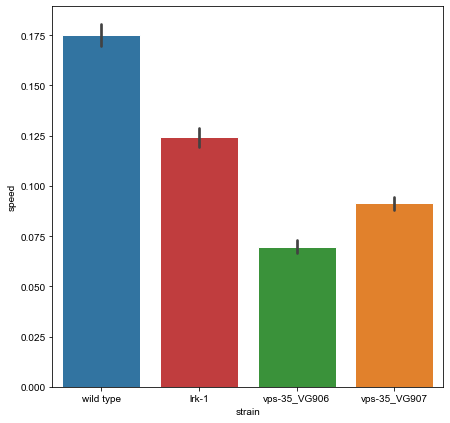

In [12]:

fig_dims = (7, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")

ax=sns.barplot(x="strain", 
            y="speed", 
            data=first, 
            palette=palette)

# plt.xticks(rotation=45)


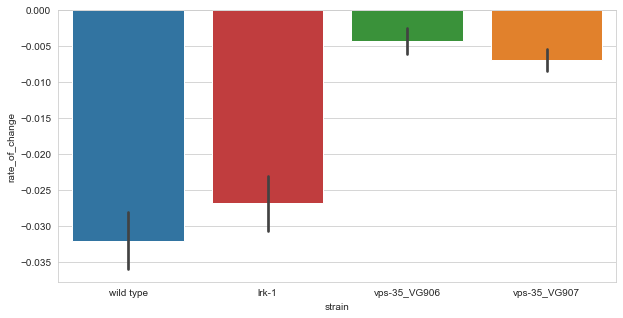

In [26]:

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set_style("whitegrid")
sns.barplot(x="strain", y="rate_of_change", data=first, palette=palette)

# Avg speed and ROC during last 3 seconds

In [14]:
start = np.arange(300, 940, 70) 

keys = []
for i in start:
    result = i+7
    keys.append(result)

values = []
for i in start:
    result = i+10
    values.append(result)

print(keys)
print(values)

[307, 377, 447, 517, 587, 657, 727, 797, 867, 937]
[310, 380, 450, 520, 590, 660, 730, 800, 870, 940]


In [15]:
res = {}
for key in keys:
    for value in values:
        res[key] = value
        values.remove(value)
        break  
        
res

{307: 310,
 377: 380,
 447: 450,
 517: 520,
 587: 590,
 657: 660,
 727: 730,
 797: 800,
 867: 870,
 937: 940}

In [16]:
last = pd.DataFrame()

for start, stop in res.items():
    df = poster_data.loc[(poster_data['time'] <= stop) & (poster_data['time'] >= start)]
    last = pd.concat([last, df], ignore_index = True)
    
last

,time,speed,rate_of_change,strain,plate_number
0,307.0,0.089475,-0.000471,wild type,1
1,308.0,0.098292,0.008817,wild type,1
2,309.0,0.098567,0.000274,wild type,1
3,310.0,0.102446,0.003879,wild type,1
4,307.0,0.115354,-0.019846,wild type,2
...,...,...,...,...,...
1235,940.0,0.091269,-0.004227,vps-35_VG907,30
1236,937.0,0.095240,-0.005156,vps-35_VG907,31
1237,938.0,0.092964,-0.002276,vps-35_VG907,31
1238,939.0,0.104744,0.011780,vps-35_VG907,31


(0.0, 0.2)

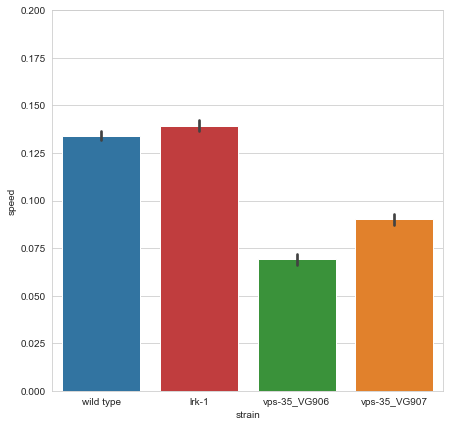

In [17]:

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")

ax=sns.barplot(x="strain", 
            y="speed", 
            data=last, 
            palette=palette)

plt.ylim(0, 0.2)

(0.0, 0.04)

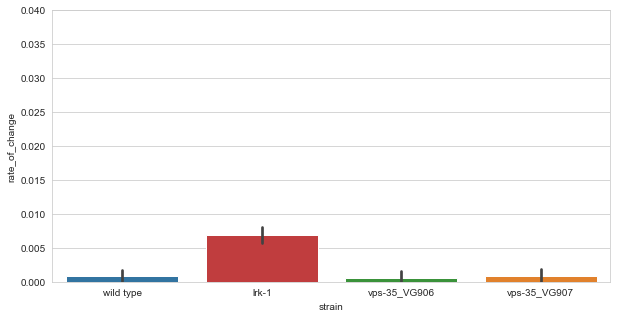

In [25]:

fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")

ax=sns.barplot(x="strain", 
            y="rate_of_change", 
            data=last, 
            palette=palette)

plt.ylim(0, 0.040)

In [77]:
concatenated = pd.concat([first.assign(dataset='first second'), last.assign(dataset='rest of pulse')])

concatenated

,time,speed,rate_of_change,strain,plate_number,dataset
0,300.0,0.231193,0.001176,wild type,1,first second
1,301.0,0.121250,-0.109943,wild type,1,first second
2,300.0,0.276915,-0.035596,wild type,2,first second
3,301.0,0.153107,-0.123808,wild type,2,first second
4,300.0,0.215300,-0.064988,wild type,3,first second
...,...,...,...,...,...,...
2785,935.0,0.098515,-0.002501,vps-35_VG907,31,rest of pulse
2786,936.0,0.100396,0.001880,vps-35_VG907,31,rest of pulse
2787,937.0,0.095240,-0.005156,vps-35_VG907,31,rest of pulse
2788,938.0,0.092964,-0.002276,vps-35_VG907,31,rest of pulse


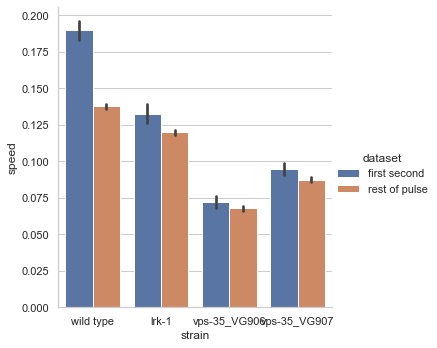

In [78]:
sns.catplot(x="strain", 
            y="speed", 
            data=concatenated,
            hue='dataset',
            kind='bar',
            palette='deep')

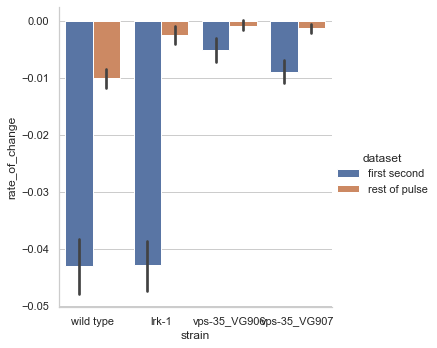

In [79]:
sns.catplot(x="strain", 
            y="rate_of_change", 
            data=concatenated,
            hue='dataset',
            kind='bar',
            palette='deep')

# Avg speed during light pulses vs recovery

In [74]:
# Must run above cells before

concatenated = pd.concat([pulses_only.assign(dataset='light on'), recovery_only.assign(dataset='light off')])

concatenated

NameError: name 'pulses_only' is not defined

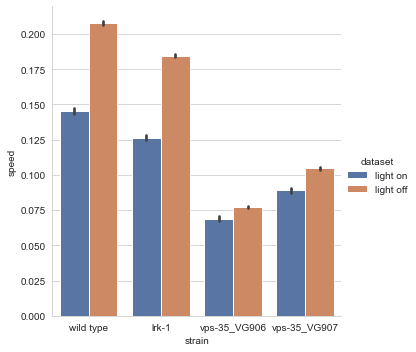

In [26]:
sns.catplot(x="strain", 
            y="speed", 
            data=concatenated,
            hue='dataset',
            kind='bar',
            palette='deep')

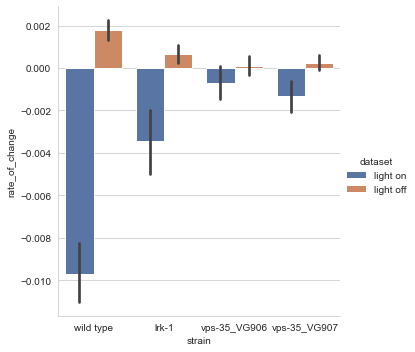

In [29]:
sns.catplot(x="strain", 
            y="rate_of_change", 
            data=concatenated,
            hue='dataset',
            kind='bar',
            palette='deep')

# Avg ROC during first 3s of recovery intervals

In [30]:
recovery_intervals = {311:313, 
                      381:383,
                      451:453,
                      521:523,
                      591:593,
                      731:733,
                      801:803,
                      871:873                      
                     }

recovery_start = pd.DataFrame()

interval = 1

for start, stop in recovery_intervals.items():
    df = poster_data.loc[(poster_data['time'] <= stop) & (poster_data['time'] >= start)]
    df['interval'] = interval
    
    recovery_start = pd.concat([recovery_start, df], ignore_index = True)
    
    interval += 1
    
recovery_start

<ipython-input-30-d5bbf49c53b3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interval'] = interval


,time,speed,rate_of_change,strain,plate_number,interval
0,311.0,0.108475,0.006029,wild type,1,1
1,312.0,0.113800,0.005325,wild type,1,1
2,313.0,0.118383,0.004583,wild type,1,1
3,311.0,0.131873,-0.012258,wild type,2,1
4,312.0,0.143893,0.012020,wild type,2,1
...,...,...,...,...,...,...
739,872.0,0.112152,0.007736,vps-35_VG907,30,8
740,873.0,0.111988,-0.000164,vps-35_VG907,30,8
741,871.0,0.075068,-0.006257,vps-35_VG907,31,8
742,872.0,0.087716,0.012648,vps-35_VG907,31,8


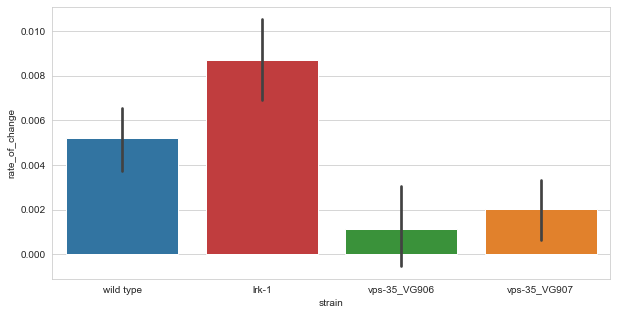

In [31]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")

ax=sns.barplot(x="strain", 
            y="rate_of_change", 
            data=recovery_start, 
            palette=palette)

